In [5]:
import warnings
import time

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.preprocessing import normalize
from sklearn.preprocessing import minmax_scale


from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score
from sklearn.metrics import davies_bouldin_score

pd.set_option('precision', 20)
warnings.simplefilter('ignore')

In [6]:
file = open('./health.txt', 'r', encoding = "utf8",)

lines = file.readlines()
lines.pop(0)

file.close()

In [7]:
dt = pd.read_csv('./bags.csv', header = None)
dt.head()

,0,1,2,3,4,5,6,7,8,9,...,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000000000000000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000000000000000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000000000000000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.55220060585879537918,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000000000000000000,0.0,0.0


In [8]:
data = normalize(dt.values, norm = 'l2')

In [18]:
variance = 0.9 # 0 to 1

start = time.time()

selected_data = None
selected_variance = None

for n in range(data.shape[1], 0, -1):
    
    pca = PCA(n_components = n)

    pca.fit(data)
    
    current_variance = pca.explained_variance_.sum(axis = 0)
    
    if (current_variance < variance):
        break;
    
    selected_variance = current_variance
    selected_data = pca.transform(data)

print("Total Features: " + str(selected_data.shape[1]))
print("Variance: " + str(selected_variance))

finish = time.time()

calculated_time = (finish - start) / 60

print("Time in Minutes: " + str(calculated_time))

Total Features: 904
Variance: 0.9001645443451526
Time in Minutes: 27.416193497180938


In [10]:
start = time.time()

k = 500
init = 'k-means++' # k-means++ / random

kmeans = KMeans(n_clusters = k,
                n_init = 1,
                max_iter = 1000,
                init = init,
                algorithm = 'auto',
                precompute_distances = 'auto',
                random_state = 0,
                verbose = False)

kmeans.fit(selected_data)

labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
loss = kmeans.inertia_

finish = time.time()

calculated_time = (finish - start) / 60

print("Time in Minutes: " + str(calculated_time))

Time in Minutes: 0.5496511499087016


In [11]:
start = time.time()

coefficient = calinski_harabaz_score(data, labels)

print("Coeficiente de Calinski " + str(coefficient))

finish = time.time()

calculated_time = (finish - start) / 60

print("Time in Minutes: " + str(calculated_time))

Coeficiente de Calinski 14.865885848334239
Time in Minutes: 0.007084544499715169


In [12]:
start = time.time()

coefficient = davies_bouldin_score(data, labels)

print("Coeficiente de Davies " + str(coefficient))

finish = time.time()

calculated_time = (finish - start) / 60

print("Time in Minutes: " + str(calculated_time))

Coeficiente de Davies 2.4395477031879444
Time in Minutes: 0.005794922510782878


In [13]:
start = time.time()

coefficient = silhouette_score(data, labels, metric = 'euclidean')

print("Coeficiente de Silhueta " + str(coefficient))

finish = time.time()

calculated_time = (finish - start) / 60

print("Time in Minutes: " + str(calculated_time))

Coeficiente de Silhueta 0.0841100468268136
Time in Minutes: 0.10542488098144531


In [14]:
total_cluster = []

for label in np.unique(labels):
    
    total = len(data[labels == label])
    
    total_cluster.append([label, total])
    
total_cluster = np.array(total_cluster)
total_cluster

array([[  0,  24],
       [  1,  22],
       [  2, 902],
       [  3,   8],
       [  4,  38],
       [  5,  24],
       [  6,  10],
       [  7,  17],
       [  8,  48],
       [  9,  22],
       [ 10,   9],
       [ 11,  19],
       [ 12,  34],
       [ 13,  43],
       [ 14,   5],
       [ 15,  29],
       [ 16,  33],
       [ 17,  15],
       [ 18,  67],
       [ 19,  37],
       [ 20,  59],
       [ 21,  72],
       [ 22,  24],
       [ 23,  54],
       [ 24,  22],
       [ 25,  48],
       [ 26,  25],
       [ 27,  46],
       [ 28,  42],
       [ 29,   9],
       [ 30,  19],
       [ 31,  54],
       [ 32,  32],
       [ 33,  13],
       [ 34,  24],
       [ 35,  40],
       [ 36,  19],
       [ 37,  69],
       [ 38,  24],
       [ 39,  27],
       [ 40,  53],
       [ 41,  33],
       [ 42,  44],
       [ 43,  24],
       [ 44,  25],
       [ 45,  35],
       [ 46,  61],
       [ 47,  11],
       [ 48,  22],
       [ 49,  19],
       [ 50,  30],
       [ 51,  17],
       [ 52,

<BarContainer object of 500 artists>

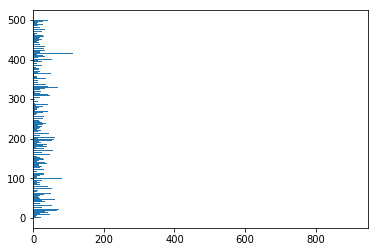

In [15]:
x = total_cluster[:, 0]
y = total_cluster[:, 1]

plt.barh(x, y)

In [17]:
cluster = 0
show = 1000


lines = np.array(lines)

current_data = lines[labels == cluster]

for current_datum in current_data[0 : show]:
    
    datum = current_datum.split("|")[2]
    
    print(datum)

She did the first ever human laser eye surgery

She did the first ever human laser eye surgery

Treat eye #allergy symptoms

Caffeinated chewing gum catches FDA's eye

Women at higher risk for eye disease

More on Anderson's eyeburn: how common is sun eye damage? 

Need some inspiration (or eye candy?) Here's the top 10 fittest men of all time

Eyeliner too close to the eye leads to contamination 

Brewers ban high fives to avoid spreading pink eye 

Man gets #bionic eye, sees family for first time in 10 years

Computer tracks eye movements to detect #concussions

Mobile game may have lasting benefit for ‘lazy’ eye

Indoor tanning can lead to burns, fainting, eye injuries

RT @eatsmartbd: A10 "Anyone can catch your eye but it takes someone special to catch your heart" – Unknown #healthtalk

RT @EinsteinMed: A1: The risk of eye, kidney and nerve damage is common to both. -Dr. C. #healthtalk

What is the relationship between eye color and #vitiligo?

Drug giant 'blocks' eye treatment

Me